In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_img,train_lab),(test_img,test_lab)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [20]:
test_img.shape

(10000, 28, 28)

In [4]:
train_img[0,23,23]

194

In [5]:
train_lab[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

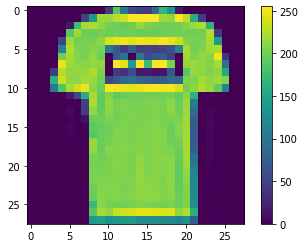

In [7]:
plt.figure()
plt.imshow(train_img[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_img=train_img/255.0
test_img=test_img/255.0

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_img,train_lab,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2324 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2255 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2184 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2137 - accuracy: 0.9198
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2058 - accuracy: 0.9224


In [14]:
test_loss,test_acc=model.evaluate(test_img,test_lab,verbose=1)
print('Test accuracy :',test_acc)

313/313 [==============================] - 0s 995us/step - loss: 0.3309 - accuracy: 0.8886
Test accuracy : 0.8885999917984009


In [15]:
predictions=model.predict(test_img)

In [16]:
predictions[0]

array([2.8704975e-10, 3.0974211e-13, 5.5350100e-11, 4.6420590e-14,
       9.7241529e-13, 1.7621391e-04, 2.0318740e-12, 1.4202557e-02,
       2.1409416e-10, 9.8562115e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [19]:
test_lab[0]

9

Please enter any number in test data(0 to 10000) :3456


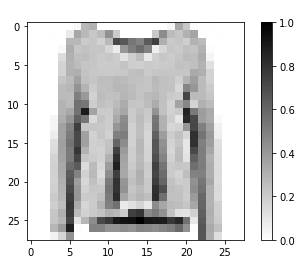

In [36]:
COLOR='white'
plt.rcParams['text.color']=COLOR
plt.rcParams['axes.labelcolor']=COLOR

def predict(model,img,correct_lab):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    pred=model.predict(np.array([img]))
    predicted_class=class_names[np.argmax(pred)]
    show_img(img,class_names[correct_lab],predicted_class)

def show_img(img,lab,guess):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.title("Expected: "+lab)
  plt.xlabel("Guess: "+guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_num():
  while True:
    num=input("Please enter any number in test data(0 to 10000) :")
    if num.isdigit():
      num=int(num)
      if 0<=num<=10000:
       return int(num)
      else:
        print("Try again")
    # else:
    #    break
  
num=get_num()
image=test_img[num]
label=test_lab[num]
predict(model,image,label)